# Explore

## Import Libraries

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

#Libraries for processing data
import pandas as pd
import numpy as np

#Import libraries for graphing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#Libraries for obtaining data from SQL databse
import env
import os

#Library for statistical testing
from scipy import stats

##Acquire function
from wrangle_zillow import wrangle_zillow
from wrangle_zillow import split_data

#Train, test, split
from sklearn.model_selection import train_test_split

#Library for dealing with NA values
from sklearn.impute import SimpleImputer

#Library needed for scaling the data
import sklearn.preprocessing

## Import Zillow Dataset

In [2]:
df = wrangle_zillow()

In [3]:
df.head()

,propertylandusetypeid,id,heatingorsystemtypeid,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate,last_trans_date,propertylandusedesc
10,269.0,10,2.0,11070347,4.0,4.0,1.0,4.0,3095.0,3095.0,...,192544.0,2016.0,53784.0,2460.72,NaN,Central,0.005963,2017-01-02,2017-01-02,Planned Unit Development
20,261.0,20,2.0,11324547,2.0,4.0,8.0,2.0,3633.0,3633.0,...,296425.0,2016.0,74104.0,6941.39,NaN,Central,0.042463,2017-01-02,2017-01-02,Single Family Residential
30,266.0,30,2.0,11524947,2.0,2.0,7.0,2.0,1090.0,1090.0,...,357568.0,2016.0,124671.0,6165.36,NaN,Central,0.021853,2017-01-02,2017-01-02,Condominium
31,261.0,31,2.0,11544747,4.0,3.0,11.0,4.0,1620.0,1620.0,...,847770.0,2016.0,508238.0,10244.94,NaN,Central,-0.019546,2017-01-02,2017-01-02,Single Family Residential
33,261.0,33,2.0,11585547,2.0,3.0,8.0,2.0,2077.0,2077.0,...,646760.0,2016.0,436568.0,7924.68,NaN,Central,-0.040807,2017-01-02,2017-01-02,Single Family Residential


In [4]:
#Now we will replace the null values with the mean value of each column
def impute_null_values(df):
    '''
    We will use SimpleImputer to impute the mean value into the null values into each column.
    '''
    #We will use the mean imputer function.
    imputer = SimpleImputer(strategy='most_frequent')

    #We will create a for loop that will impute all the null values in each one of our columns.
    for col in df.columns:
        df[[col]] = imputer.fit_transform(df[[col]])
    
    return df

In [5]:
df = impute_null_values(df)

In [6]:
train, validate, test = split_data(df)

In [60]:
train.head()

,propertylandusetypeid,id,heatingorsystemtypeid,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate,last_trans_date,propertylandusedesc
2462,261.0,2462.0,2.0,11020724.0,2.0,3.0,6.0,2.0,1406.0,1406.0,...,460200.0,2016.0,360400.0,5727.60,6.037110e+13,Central,-0.009313,2017-01-12,2017-01-12,Single Family Residential
74293,261.0,74293.0,2.0,11089877.0,2.0,4.0,6.0,2.0,1665.0,1665.0,...,252423.0,2016.0,94356.0,3163.81,6.037113e+13,Central,0.109348,2017-09-07,2017-09-07,Single Family Residential
47347,261.0,47347.0,2.0,11075321.0,3.0,4.0,8.0,3.0,2365.0,2365.0,...,355893.0,2016.0,173410.0,4548.83,6.037111e+13,Central,0.006360,2017-06-16,2017-06-16,Single Family Residential
32586,261.0,32586.0,2.0,11088659.0,2.0,3.0,6.0,2.0,1348.0,1348.0,...,267039.0,2016.0,134526.0,3412.71,6.037113e+13,Central,0.011047,2017-05-03,2017-05-03,Single Family Residential
51749,261.0,51749.0,7.0,12342656.0,1.0,3.0,4.0,1.0,1062.0,1062.0,...,235767.0,2016.0,167237.0,2988.15,6.037554e+13,Floor/Wall,0.021502,2017-06-29,2017-06-29,Single Family Residential


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39175 entries, 2462 to 18266
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         39175 non-null  float64
 1   id                            39175 non-null  float64
 2   heatingorsystemtypeid         39175 non-null  float64
 3   parcelid                      39175 non-null  float64
 4   bathroomcnt                   39175 non-null  float64
 5   bedroomcnt                    39175 non-null  float64
 6   buildingqualitytypeid         39175 non-null  float64
 7   calculatedbathnbr             39175 non-null  float64
 8   calculatedfinishedsquarefeet  39175 non-null  float64
 9   finishedsquarefeet12          39175 non-null  float64
 10  fips                          39175 non-null  float64
 11  fullbathcnt                   39175 non-null  float64
 12  latitude                      39175 non-null  float64
 13

## Does the logerror of a property differ by county?

### Graphs

In [7]:
sns.set_palette("bright")

In [63]:
train.fips.value_counts()

6037.0    26042
6059.0     9903
6111.0     3230
Name: fips, dtype: int64

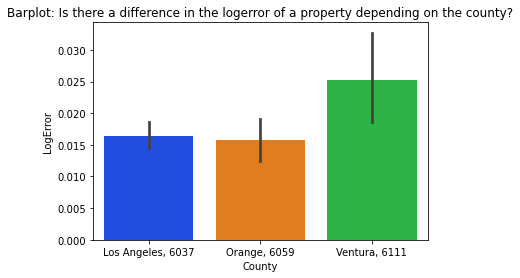

In [64]:
county_log_error = sns.barplot(data = train, y = 'logerror', x = 'fips')
title = plt.title("Barplot: Is there a difference in the logerror of a property depending on the county?")
xlabel = plt.xlabel("County")
ylabel = plt.ylabel("LogError")
xticks = county_log_error.set_xticklabels(["Los Angeles, 6037", "Orange, 6059", "Ventura, 6111"])

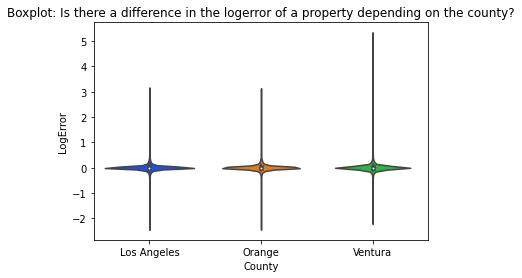

In [65]:
county_log_error = sns.violinplot(data = train, y = 'logerror', x = 'fips')
title = plt.title("Boxplot: Is there a difference in the logerror of a property depending on the county?")
xlabel = plt.xlabel("County")
ylabel = plt.ylabel("LogError")
xticks = county_log_error.set_xticklabels(["Los Angeles", "Orange", "Ventura"])

### Statistical Testing

#### Leven's Test

$H_0$: There is no difference in log error variance between Los Angeles and Orange County. 

$H_a$: There is a significant different in log error variance between Los Angeles and Orange County.

In [66]:
stats.levene(
    train.query('fips == 6037.0').logerror,
    train.query('fips == 6059.0').logerror,
)

LeveneResult(statistic=0.2922519988069781, pvalue=0.5887843475165777)

Because of a high p-value, we fail to reject the null hypothesis.

$H_0$: There is no difference in log error variance between Los Angeles and Ventura County. 

$H_a$: There is a significant different in log error variance between Los Angeles and Ventura County.

In [67]:
stats.levene(
    train.query('fips == 6037.0').logerror,
    train.query('fips == 6111.0').logerror,
)

LeveneResult(statistic=0.811996093595627, pvalue=0.3675381765653868)

Because of a high p-value, we fail to reject the null hypothesis.

$H_0$: There is no difference in log error variance between Orange and Ventura County. 

$H_a$: There is a significant different in log error variance between Orange and Ventura County.

In [68]:
stats.levene(
    train.query('fips == 6059.0').logerror,
    train.query('fips == 6111.0').logerror,
)

LeveneResult(statistic=0.26029144489707706, pvalue=0.6099285743995952)

Because of a high p-value, we fail to reject the null hypothesis.

#### T test

In [69]:
stats.ttest_ind(
    train.query('fips == 6037.0').logerror,
    train.query('fips == 6059.0').logerror,
    equal_var = True
)

Ttest_indResult(statistic=0.3744968199332362, pvalue=0.7080369314010183)

In [70]:
stats.ttest_ind(
    train.query('fips == 6037.0').logerror,
    train.query('fips == 6111.0').logerror,
    equal_var = True
)

Ttest_indResult(statistic=-2.7295762208762, pvalue=0.006345368610063448)

In [71]:
stats.ttest_ind(
    train.query('fips == 6111.0').logerror,
    train.query('fips == 6059.0').logerror,
    equal_var = True
)

Ttest_indResult(statistic=2.658837258745088, pvalue=0.007850591636554086)

We conclude that there is no significant difference for logerror between homes in Los Angles and Orange County. 

However, Orange and Los Angeles County both have significantly different log error from Ventura County.

## Is there a relationship between Tax Amount and logerror?

### Graphs

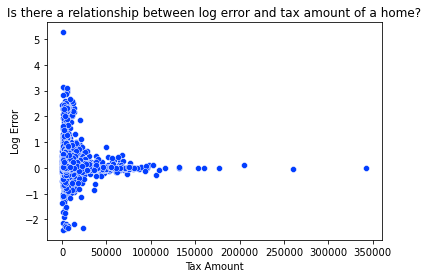

In [78]:
taxvalue_scatterplot = sns.scatterplot(data = train, 
                                      x = "taxamount", 
                                      y = "logerror")
set_labels = taxvalue_scatterplot.set(xlabel='Tax Amount', ylabel = "Log Error", Title = "Is there a relationship between log error and tax amount of a home?")


In [79]:
test_results = stats.pearsonr(train.taxamount, train.logerror)
test_results

(0.001560409664754406, 0.7574454055872194)

Because our pvalue is high, we conclude there is no direct correlation between taxvalue of a home and log error.

In [110]:
train['tax_amount_bin'] = pd.cut(train.taxamount, [0, 5000, 350000])

In [111]:
train.head()

,propertylandusetypeid,id,heatingorsystemtypeid,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate,last_trans_date,propertylandusedesc,tax_amount_bin
2462,261.0,2462.0,2.0,11020724.0,2.0,3.0,6.0,2.0,1406.0,1406.0,...,2016.0,360400.0,5727.60,6.037110e+13,Central,-0.009313,2017-01-12,2017-01-12,Single Family Residential,"(5000, 350000]"
74293,261.0,74293.0,2.0,11089877.0,2.0,4.0,6.0,2.0,1665.0,1665.0,...,2016.0,94356.0,3163.81,6.037113e+13,Central,0.109348,2017-09-07,2017-09-07,Single Family Residential,"(0, 5000]"
47347,261.0,47347.0,2.0,11075321.0,3.0,4.0,8.0,3.0,2365.0,2365.0,...,2016.0,173410.0,4548.83,6.037111e+13,Central,0.006360,2017-06-16,2017-06-16,Single Family Residential,"(0, 5000]"
32586,261.0,32586.0,2.0,11088659.0,2.0,3.0,6.0,2.0,1348.0,1348.0,...,2016.0,134526.0,3412.71,6.037113e+13,Central,0.011047,2017-05-03,2017-05-03,Single Family Residential,"(0, 5000]"
51749,261.0,51749.0,7.0,12342656.0,1.0,3.0,4.0,1.0,1062.0,1062.0,...,2016.0,167237.0,2988.15,6.037554e+13,Floor/Wall,0.021502,2017-06-29,2017-06-29,Single Family Residential,"(0, 5000]"


<AxesSubplot:title={'center':'Distribution of tax amount'}>

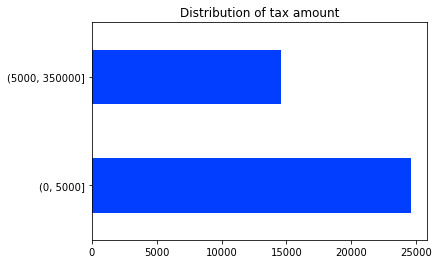

In [112]:
train.tax_amount_bin.value_counts().plot.barh(title = "Distribution of tax amount")

<AxesSubplot:xlabel='tax_amount_bin', ylabel='logerror'>

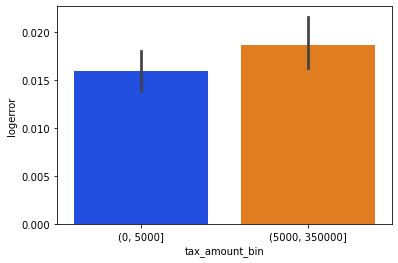

In [113]:
sns.barplot(data=train, y='logerror', x='tax_amount_bin')


In [114]:
stats.levene(
    train[train.taxamount <= 5000].logerror,
    train[train.taxamount > 5000].logerror,
)

LeveneResult(statistic=0.16630477584868666, pvalue=0.6834191991510213)

In [141]:
stats.ttest_ind(
    train[train.taxamount <= 5000].logerror,
    train[train.taxamount > 5000].logerror,
    equal_var=True
)


Ttest_indResult(statistic=-1.5306433646053854, pvalue=0.12586563299309636)

#### Conclusion

We fail to reject the null hypothesis log error is signficantly different for properties that pay more than 5000 in taxes and properties that pay less than or equal to 5000 in taxes.

## If we control for tax amount, does logerror differ between counties?

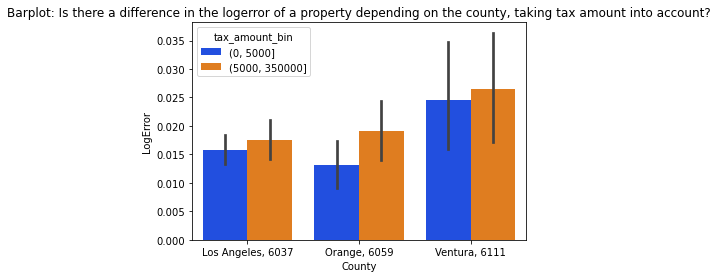

In [134]:
county_log_error = sns.barplot(data = train, y = 'logerror', x = 'fips', hue = 'tax_amount_bin', palette = "bright")
title = plt.title("Barplot: Is there a difference in the logerror of a property depending on the county, taking tax amount into account?")
xlabel = plt.xlabel("County")
ylabel = plt.ylabel("LogError")
xticks = county_log_error.set_xticklabels(["Los Angeles, 6037", "Orange, 6059", "Ventura, 6111"])

In [143]:
low_tax = train[train.taxamount <= 5000]
high_tax = train[train.taxamount > 5000]

In [144]:
stats.ttest_ind(
    high_tax[high_tax.fips == 6111.0].logerror,
    high_tax[high_tax.fips != 6111.0].logerror,
    equal_var=True
)

Ttest_indResult(statistic=1.622236871941684, pvalue=0.10477426237468493)

In [145]:
stats.ttest_ind(
    low_tax[low_tax.fips == 6111.0].logerror,
    low_tax[low_tax.fips != 6111.0].logerror,
    equal_var=True
)

Ttest_indResult(statistic=2.3697816272285097, pvalue=0.01780626674674716)

#### Conclusion

When we control for tax amount, the low tax group still has a significant difference in log error in Orange/Los Angeles vs. Ventura County. The high tax group does not.

## Does Log Error Significantly Differ by Longitude?

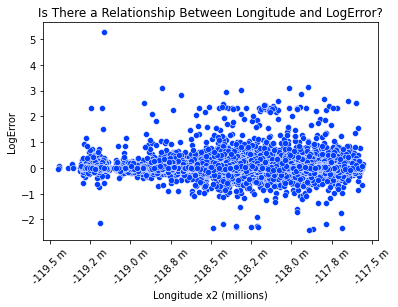

In [23]:
longitude_logerror = sns.scatterplot(x = train.longitude, y = train.logerror)
longitude_logerror.set(xlabel='Longitude x2 (millions)', ylabel = "LogError", Title = "Is There a Relationship Between Longitude and LogError?")
longitude_logerror.xaxis.set_major_formatter(lambda x, pos: '{:.1f} m'.format(x / 1_000_000))
rotate = plt.xticks(rotation = 45)

In [26]:
train['longitude_bin'] = pd.cut(train.taxamount, [-119.5*2*1_000000, -118.8*2*1000000, -117.5*2*1000000])


In [27]:
train.head()

,propertylandusetypeid,id,heatingorsystemtypeid,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate,last_trans_date,propertylandusedesc,tax_amount_bin,longitude_bin
2462,261.0,2462,2.0,11020724,2.0,3.0,6.0,2.0,1406.0,1406.0,...,360400.0,5727.60,6.037110e+13,Central,-0.009313,2017-01-12,2017-01-12,Single Family Residential,NaN,NaN
74293,261.0,74293,2.0,11089877,2.0,4.0,6.0,2.0,1665.0,1665.0,...,94356.0,3163.81,6.037113e+13,Central,0.109348,2017-09-07,2017-09-07,Single Family Residential,NaN,NaN
47347,261.0,47347,2.0,11075321,3.0,4.0,8.0,3.0,2365.0,2365.0,...,173410.0,4548.83,6.037111e+13,Central,0.006360,2017-06-16,2017-06-16,Single Family Residential,NaN,NaN
32586,261.0,32586,2.0,11088659,2.0,3.0,6.0,2.0,1348.0,1348.0,...,134526.0,3412.71,6.037113e+13,Central,0.011047,2017-05-03,2017-05-03,Single Family Residential,NaN,NaN
51749,261.0,51749,7.0,12342656,1.0,3.0,4.0,1.0,1062.0,1062.0,...,167237.0,2988.15,6.037554e+13,Floor/Wall,0.021502,2017-06-29,2017-06-29,Single Family Residential,NaN,NaN
